In [1]:
import datetime
import pandas as pd
from etcalculator import ETCalculator
import sys
import numpy
from scipy import stats
numpy.set_printoptions(threshold=sys.maxsize)
from matplotlib import pyplot, dates, ticker
import warnings
warnings.filterwarnings("ignore")

In [2]:
file = pd.read_csv(r"C:\Users\abhir\OneDrive - Oklahoma A and M System\Oklahoma State University\GRA\Water quality data\horse creek\Pamula.csv")
pfile = pd.read_csv(r"C:\Users\abhir\OneDrive - Oklahoma A and M System\Oklahoma State University\GRA\water quality modeling\Mesonet_ET_Daily_MIAM.txt", delim_whitespace=True)

In [3]:
file.head()

,STID,TIME,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD
0,MIAM,2001-01-01T00:00,29.56,16,-999,-999,11,83,207,2,2,0.0,0
1,MIAM,2001-01-01T00:05,29.56,16,-999,-999,12,83,219,2,3,0.0,0
2,MIAM,2001-01-01T00:10,29.56,16,-999,-999,12,83,239,3,3,0.0,0
3,MIAM,2001-01-01T00:15,29.56,16,-999,-999,12,83,236,0,1,0.0,0
4,MIAM,2001-01-01T00:20,29.56,16,-999,-999,12,83,236,0,1,0.0,0


In [4]:
file.tail()

,STID,TIME,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD
2182747,MIAM,2021-10-01T23:35,29.18,70,-999,-999,68,96,100,3,4,0.02,0
2182748,MIAM,2021-10-01T23:40,29.18,70,-999,-999,68,96,110,3,4,0.02,0
2182749,MIAM,2021-10-01T23:45,29.17,70,-999,-999,68,96,113,4,5,0.02,0
2182750,MIAM,2021-10-01T23:50,29.17,70,-999,-999,68,96,112,4,5,0.02,0
2182751,MIAM,2021-10-01T23:55,29.17,70,-999,-999,68,96,117,5,6,0.02,0


In [5]:
pfile.tail()

,YEAR,MM,DD,ETOS,ETRS,ETCOOL,ETWARM,PANEVAP
7300,2020,12,27,0.10,0.17,0.10,0.06,0.15
7301,2020,12,28,0.03,0.04,0.02,0.02,0.03
7302,2020,12,29,0.06,0.10,0.06,0.04,0.08
7303,2020,12,30,0.03,0.04,0.03,0.02,0.04
7304,2020,12,31,0.02,0.03,0.02,0.01,0.03


In [6]:
cols=["YEAR","MM","DD"]
pfile['date'] = pfile[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
pfile.head()

,YEAR,MM,DD,ETOS,ETRS,ETCOOL,ETWARM,PANEVAP,date
0,2001,1,1,0.01,0.01,0.01,0.01,0.01,2001-1-1
1,2001,1,2,0.01,0.02,0.01,0.01,0.02,2001-1-2
2,2001,1,3,0.02,0.02,0.02,0.01,0.02,2001-1-3
3,2001,1,4,0.03,0.03,0.02,0.02,0.03,2001-1-4
4,2001,1,5,0.03,0.04,0.03,0.02,0.03,2001-1-5


In [7]:
pfile["PANEVAP"] = pfile["PANEVAP"].replace( -999, numpy.nan) 
pfile.head()

,YEAR,MM,DD,ETOS,ETRS,ETCOOL,ETWARM,PANEVAP,date
0,2001,1,1,0.01,0.01,0.01,0.01,0.01,2001-1-1
1,2001,1,2,0.01,0.02,0.01,0.01,0.02,2001-1-2
2,2001,1,3,0.02,0.02,0.02,0.01,0.02,2001-1-3
3,2001,1,4,0.03,0.03,0.02,0.02,0.03,2001-1-4
4,2001,1,5,0.03,0.04,0.03,0.02,0.03,2001-1-5


In [8]:
# start and end dates
start = datetime.datetime(2001, 1, 1)
end   = datetime.datetime(2021, 1, 1)

In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182752 entries, 0 to 2182751
Data columns (total 13 columns):
 #   Column  Dtype  
---  ------  -----  
 0   STID    object 
 1   TIME    object 
 2   PRES    float64
 3   TAIR    int64  
 4   TMIN    int64  
 5   TMAX    int64  
 6   TDEW    int64  
 7   RELH    int64  
 8   WDIR    int64  
 9   WSPD    int64  
 10  WMAX    int64  
 11  RAIN    float64
 12  SRAD    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 216.5+ MB


In [10]:
file["TIME"] = pd.to_datetime(file["TIME"])

In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182752 entries, 0 to 2182751
Data columns (total 13 columns):
 #   Column  Dtype         
---  ------  -----         
 0   STID    object        
 1   TIME    datetime64[ns]
 2   PRES    float64       
 3   TAIR    int64         
 4   TMIN    int64         
 5   TMAX    int64         
 6   TDEW    int64         
 7   RELH    int64         
 8   WDIR    int64         
 9   WSPD    int64         
 10  WMAX    int64         
 11  RAIN    float64       
 12  SRAD    int64         
dtypes: datetime64[ns](1), float64(2), int64(9), object(1)
memory usage: 216.5+ MB


In [12]:
mask = (file['TIME'] >= start) & (file['TIME'] <= end)
dc_cleaning = file.loc[mask]
dc_cleaning.head()

,STID,TIME,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD
0,MIAM,2001-01-01 00:00:00,29.56,16,-999,-999,11,83,207,2,2,0.0,0
1,MIAM,2001-01-01 00:05:00,29.56,16,-999,-999,12,83,219,2,3,0.0,0
2,MIAM,2001-01-01 00:10:00,29.56,16,-999,-999,12,83,239,3,3,0.0,0
3,MIAM,2001-01-01 00:15:00,29.56,16,-999,-999,12,83,236,0,1,0.0,0
4,MIAM,2001-01-01 00:20:00,29.56,16,-999,-999,12,83,236,0,1,0.0,0


In [13]:
count = 0
for i in dc_cleaning["TAIR"]:
    if i < -10:
        count = count+1
print(count)

14113


In [14]:
count = 0
for i in dc_cleaning["TAIR"]:
    if i == -99:
        count = count+1
print(count)

0


In [15]:
count = 0
for i in dc_cleaning["TAIR"]:
    if i == -999:
        count = count+1
print(count)

9212


In [16]:
count = 0
for i in dc_cleaning["TAIR"]:
    if i == -996:
        count = count+1
print(count)

4819


In [17]:
#dc_cleaning["TMIN"] = dc_cleaning["TMIN"].replace( -999, numpy.nan) 
#dc_cleaning["TMAX"] = dc_cleaning["TMAX"].replace( -999, numpy.nan)
dc_cleaning["TAIR"] = dc_cleaning["TAIR"].replace( -999, numpy.nan)
dc_cleaning["TAIR"] = dc_cleaning["TAIR"].replace( -996, numpy.nan)
dc_cleaning.head()

,STID,TIME,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD
0,MIAM,2001-01-01 00:00:00,29.56,16.0,-999,-999,11,83,207,2,2,0.0,0
1,MIAM,2001-01-01 00:05:00,29.56,16.0,-999,-999,12,83,219,2,3,0.0,0
2,MIAM,2001-01-01 00:10:00,29.56,16.0,-999,-999,12,83,239,3,3,0.0,0
3,MIAM,2001-01-01 00:15:00,29.56,16.0,-999,-999,12,83,236,0,1,0.0,0
4,MIAM,2001-01-01 00:20:00,29.56,16.0,-999,-999,12,83,236,0,1,0.0,0


In [18]:
dc_cleaning["TC"] = (dc_cleaning["TAIR"] - 32)/1.8
dc_cleaning.tail()

,STID,TIME,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC
2103836,MIAM,2020-12-31 23:40:00,28.98,32.0,-999,-999,30,93,42,17,22,0.49,0,0.0
2103837,MIAM,2020-12-31 23:45:00,28.97,32.0,-999,-999,30,92,42,17,21,0.50,0,0.0
2103838,MIAM,2020-12-31 23:50:00,28.98,32.0,-999,-999,30,92,47,14,22,0.51,0,0.0
2103839,MIAM,2020-12-31 23:55:00,28.98,32.0,-999,-999,30,92,49,13,17,0.51,0,0.0
2103840,MIAM,2021-01-01 00:00:00,28.97,32.0,-999,-999,30,92,47,13,19,0.52,0,0.0


In [19]:
count = 0
for i in dc_cleaning["TDEW"]:
    if i == -999:
        count = count+1
print(count)

23265


In [20]:
count = 0
for i in dc_cleaning["TDEW"]:
    if i == -996:
        count = count+1
print(count)

0


In [21]:
count = 0
for i in dc_cleaning["TDEW"]:
    if i == -99:
        count = count+1
print(count)

0


In [22]:
dc_cleaning["TDEW"] = dc_cleaning["TDEW"].replace( -999, numpy.nan)

In [23]:
dc_cleaning["TD"] = (dc_cleaning["TDEW"] - 32)/1.8
dc_cleaning.tail()

,STID,TIME,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD
2103836,MIAM,2020-12-31 23:40:00,28.98,32.0,-999,-999,30.0,93,42,17,22,0.49,0,0.0,-1.111111
2103837,MIAM,2020-12-31 23:45:00,28.97,32.0,-999,-999,30.0,92,42,17,21,0.50,0,0.0,-1.111111
2103838,MIAM,2020-12-31 23:50:00,28.98,32.0,-999,-999,30.0,92,47,14,22,0.51,0,0.0,-1.111111
2103839,MIAM,2020-12-31 23:55:00,28.98,32.0,-999,-999,30.0,92,49,13,17,0.51,0,0.0,-1.111111
2103840,MIAM,2021-01-01 00:00:00,28.97,32.0,-999,-999,30.0,92,47,13,19,0.52,0,0.0,-1.111111


In [24]:
count = 0
for i in dc_cleaning["WSPD"]:
    if i == -999:
        count = count+1
print(count)

25121


In [25]:
count = 0
for i in dc_cleaning["WSPD"]:
    if i == -996:
        count = count+1
print(count)

4790


In [26]:
count = 0
for i in dc_cleaning["WSPD"]:
    if i == -99:
        count = count+1
print(count)

0


In [27]:
dc_cleaning["WSPD"] = dc_cleaning["WSPD"].replace( -999, numpy.nan)
dc_cleaning["WSPD"] = dc_cleaning["WSPD"].replace( -996, numpy.nan)
dc_cleaning.tail()

,STID,TIME,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD
2103836,MIAM,2020-12-31 23:40:00,28.98,32.0,-999,-999,30.0,93,42,17.0,22,0.49,0,0.0,-1.111111
2103837,MIAM,2020-12-31 23:45:00,28.97,32.0,-999,-999,30.0,92,42,17.0,21,0.50,0,0.0,-1.111111
2103838,MIAM,2020-12-31 23:50:00,28.98,32.0,-999,-999,30.0,92,47,14.0,22,0.51,0,0.0,-1.111111
2103839,MIAM,2020-12-31 23:55:00,28.98,32.0,-999,-999,30.0,92,49,13.0,17,0.51,0,0.0,-1.111111
2103840,MIAM,2021-01-01 00:00:00,28.97,32.0,-999,-999,30.0,92,47,13.0,19,0.52,0,0.0,-1.111111


In [28]:
dc_cleaning["WS"] = dc_cleaning["WSPD"] / 3600
dc_cleaning.tail()

,STID,TIME,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD,WS
2103836,MIAM,2020-12-31 23:40:00,28.98,32.0,-999,-999,30.0,93,42,17.0,22,0.49,0,0.0,-1.111111,0.004722
2103837,MIAM,2020-12-31 23:45:00,28.97,32.0,-999,-999,30.0,92,42,17.0,21,0.50,0,0.0,-1.111111,0.004722
2103838,MIAM,2020-12-31 23:50:00,28.98,32.0,-999,-999,30.0,92,47,14.0,22,0.51,0,0.0,-1.111111,0.003889
2103839,MIAM,2020-12-31 23:55:00,28.98,32.0,-999,-999,30.0,92,49,13.0,17,0.51,0,0.0,-1.111111,0.003611
2103840,MIAM,2021-01-01 00:00:00,28.97,32.0,-999,-999,30.0,92,47,13.0,19,0.52,0,0.0,-1.111111,0.003611


In [29]:
count = 0
for i,j in zip(dc_cleaning["TIME"], dc_cleaning["TC"]):
    if j < -10:
        count = count+1
print(count)

15614


<AxesSubplot:xlabel='TIME'>

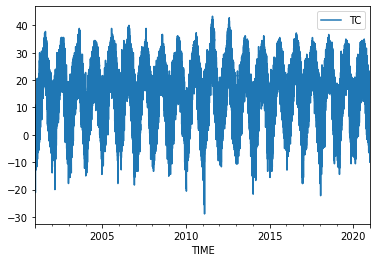

In [30]:
dc_cleaning.plot( 'TIME' , 'TC' )

<AxesSubplot:xlabel='TIME'>

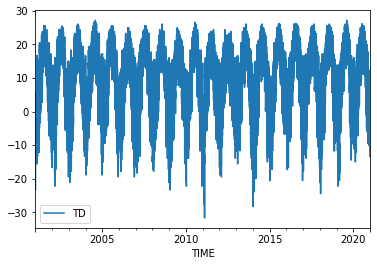

In [31]:
dc_cleaning.plot( 'TIME' , 'TD' )

In [32]:
count = 0
for i,j in zip(dc_cleaning["TIME"], dc_cleaning["TD"]):
    if j < -10:
        count = count+1
print(count)

63197


<AxesSubplot:xlabel='TIME'>

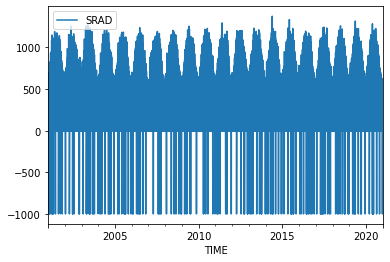

In [33]:
dc_cleaning.plot( 'TIME' , 'SRAD' )

In [34]:
count = 0
for i in dc_cleaning["SRAD"]:
    if i == -999:
        count = count+1
print(count)

6716


In [35]:
count = 0
for i in dc_cleaning["SRAD"]:
    if i == -996:
        count = count+1
print(count)

4793


In [36]:
count = 0
for i in dc_cleaning["SRAD"]:
    if i == -99:
        count = count+1
print(count)

0


In [37]:
dc_cleaning["SRAD"] = dc_cleaning["SRAD"].replace( -999, numpy.nan)
dc_cleaning["SRAD"] = dc_cleaning["SRAD"].replace( -996, numpy.nan)
dc_cleaning.head()

,STID,TIME,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD,WS
0,MIAM,2001-01-01 00:00:00,29.56,16.0,-999,-999,11.0,83,207,2.0,2,0.0,0.0,-8.888889,-11.666667,0.000556
1,MIAM,2001-01-01 00:05:00,29.56,16.0,-999,-999,12.0,83,219,2.0,3,0.0,0.0,-8.888889,-11.111111,0.000556
2,MIAM,2001-01-01 00:10:00,29.56,16.0,-999,-999,12.0,83,239,3.0,3,0.0,0.0,-8.888889,-11.111111,0.000833
3,MIAM,2001-01-01 00:15:00,29.56,16.0,-999,-999,12.0,83,236,0.0,1,0.0,0.0,-8.888889,-11.111111,0.000000
4,MIAM,2001-01-01 00:20:00,29.56,16.0,-999,-999,12.0,83,236,0.0,1,0.0,0.0,-8.888889,-11.111111,0.000000


<AxesSubplot:xlabel='TIME'>

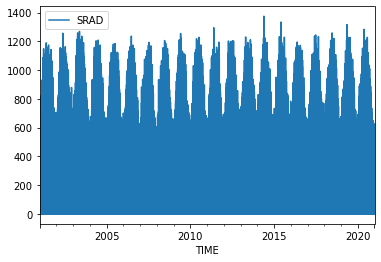

In [38]:
dc_cleaning.plot( 'TIME' , 'SRAD' )

In [39]:
#nan_data = dc_cleaning[dc_cleaning['TC'].isna()]
#nan_data.to_csv("nan_data.csv")

In [40]:
dc_resampled = dc_cleaning.set_index('TIME').resample('H').mean()
dc_resampled.head()

dc_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175321 entries, 2001-01-01 00:00:00 to 2021-01-01 00:00:00
Freq: H
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PRES    175321 non-null  float64
 1   TAIR    174280 non-null  float64
 2   TMIN    175321 non-null  float64
 3   TMAX    175321 non-null  float64
 4   TDEW    173510 non-null  float64
 5   RELH    175321 non-null  float64
 6   WDIR    175321 non-null  float64
 7   WSPD    172977 non-null  float64
 8   WMAX    175321 non-null  float64
 9   RAIN    175321 non-null  float64
 10  SRAD    174489 non-null  float64
 11  TC      174280 non-null  float64
 12  TD      173510 non-null  float64
 13  WS      172977 non-null  float64
dtypes: float64(14)
memory usage: 20.1 MB


In [41]:
mask_test = (dc_cleaning['TIME'] >= datetime.datetime(2020, 10, 20, 13,0,0)) & (dc_cleaning['TIME'] <= datetime.datetime(2020, 10, 20, 16,55,0))
test_hour = dc_cleaning.loc[mask_test]
test_hour

,STID,TIME,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD,WS
2082972,MIAM,2020-10-20 13:00:00,29.10,56.0,-999,-999,55.0,96,167,7.0,9,0.13,218.0,13.333333,12.777778,0.001944
2082973,MIAM,2020-10-20 13:05:00,29.10,57.0,-999,-999,56.0,96,174,6.0,7,0.13,199.0,13.888889,13.333333,0.001667
2082974,MIAM,2020-10-20 13:10:00,29.10,57.0,-999,-999,56.0,96,178,5.0,7,0.13,182.0,13.888889,13.333333,0.001389
2082975,MIAM,2020-10-20 13:15:00,29.10,58.0,-999,-999,56.0,96,181,4.0,7,0.13,193.0,14.444444,13.333333,0.001111
2082976,MIAM,2020-10-20 13:20:00,29.09,58.0,-999,-999,56.0,95,179,6.0,9,0.13,217.0,14.444444,13.333333,0.001667
2082977,MIAM,2020-10-20 13:25:00,29.09,58.0,-999,-999,57.0,95,166,6.0,9,0.13,221.0,14.444444,13.888889,0.001667
2082978,MIAM,2020-10-20 13:30:00,29.08,58.0,-999,-999,57.0,95,182,6.0,9,0.13,185.0,14.444444,13.888889,0.001667
2082979,MIAM,2020-10-20 13:35:00,29.08,59.0,-999,-999,57.0,95,168,6.0,9,0.13,151.0,15.000000,13.888889,0.001667
2082980,MIAM,2020-10-20 13:40:00,29.08,59.0,-999,-999,57.0,95,182,6.0,8,0.13,169.0,15.000000,13.888889,0.001667
2082981,MIAM,2020-10-20 13:45:00,29.08,59.0,-999,-999,58.0,95,175,7.0,9,0.13,135.0,15.000000,14.444444,0.001944


In [42]:
dc_resampled[dc_resampled['TC'].isna()][0:50]

,PRES,TAIR,TMIN,TMAX,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD,WS
TIME,,,,,,,,,,,,,,
2001-01-03 15:00:00,-999.000000,NaN,-999.0,-999.0,NaN,-999.000000,-999.000000,NaN,-999.000000,-996.000000,NaN,NaN,NaN,NaN
2001-04-26 13:00:00,-999.000000,NaN,-999.0,-999.0,NaN,-999.000000,-999.000000,NaN,-999.000000,-996.000000,NaN,NaN,NaN,NaN
2001-08-16 08:00:00,-999.000000,NaN,-999.0,-999.0,NaN,-999.000000,-999.000000,NaN,-999.000000,-996.000000,NaN,NaN,NaN,NaN
2002-11-06 14:00:00,-999.000000,NaN,-999.0,-999.0,NaN,-999.000000,-999.000000,NaN,-999.000000,-999.000000,NaN,NaN,NaN,NaN
2004-08-11 10:00:00,-999.000000,NaN,-999.0,-999.0,NaN,-999.000000,-999.000000,NaN,-999.000000,-996.000000,NaN,NaN,NaN,NaN
2005-08-01 15:00:00,-999.000000,NaN,-999.0,-999.0,NaN,-999.000000,-999.000000,NaN,-999.000000,-996.000000,NaN,NaN,NaN,NaN
2005-08-02 07:00:00,-999.000000,NaN,-999.0,-999.0,NaN,-999.000000,-999.000000,NaN,-999.000000,-996.000000,NaN,NaN,NaN,NaN
2006-02-01 08:00:00,-996.000000,NaN,-999.0,-999.0,NaN,-996.000000,-996.000000,NaN,-996.000000,-996.000000,NaN,NaN,NaN,NaN
2006-02-01 09:00:00,-996.000000,NaN,-999.0,-999.0,NaN,-996.000000,-996.000000,NaN,-996.000000,-996.000000,NaN,NaN,NaN,NaN


In [43]:
dc_resampled = dc_resampled.drop(["TMIN", "TMAX"], axis =1)
dc_resampled.head()

,PRES,TAIR,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD,WS
TIME,,,,,,,,,,,,
2001-01-01 00:00:00,29.560833,16.166667,12.250000,83.916667,251.333333,1.833333,3.000000,0.0,0.0,-8.796296,-10.972222,0.000509
2001-01-01 01:00:00,29.561667,16.750000,13.000000,86.333333,283.000000,2.250000,3.250000,0.0,0.0,-8.472222,-10.555556,0.000625
2001-01-01 02:00:00,29.561667,15.416667,12.583333,88.083333,90.416667,1.833333,2.416667,0.0,0.0,-9.212963,-10.787037,0.000509
2001-01-01 03:00:00,29.567500,15.000000,12.916667,88.833333,93.000000,2.083333,2.583333,0.0,0.0,-9.444444,-10.601852,0.000579
2001-01-01 04:00:00,29.565000,15.250000,13.000000,89.000000,96.250000,2.166667,2.916667,0.0,0.0,-9.305556,-10.555556,0.000602


In [44]:
dc_resampled[0:50]

,PRES,TAIR,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD,WS
TIME,,,,,,,,,,,,
2001-01-01 00:00:00,29.560833,16.166667,12.250000,83.916667,251.333333,1.833333,3.000000,0.0,0.000000,-8.796296,-10.972222,0.000509
2001-01-01 01:00:00,29.561667,16.750000,13.000000,86.333333,283.000000,2.250000,3.250000,0.0,0.000000,-8.472222,-10.555556,0.000625
2001-01-01 02:00:00,29.561667,15.416667,12.583333,88.083333,90.416667,1.833333,2.416667,0.0,0.000000,-9.212963,-10.787037,0.000509
2001-01-01 03:00:00,29.567500,15.000000,12.916667,88.833333,93.000000,2.083333,2.583333,0.0,0.000000,-9.444444,-10.601852,0.000579
2001-01-01 04:00:00,29.565000,15.250000,13.000000,89.000000,96.250000,2.166667,2.916667,0.0,0.000000,-9.305556,-10.555556,0.000602
2001-01-01 05:00:00,29.570000,15.666667,13.000000,89.000000,74.166667,1.333333,1.833333,0.0,0.000000,-9.074074,-10.555556,0.000370
2001-01-01 06:00:00,29.582500,15.000000,13.000000,89.000000,41.833333,3.250000,4.166667,0.0,0.000000,-9.444444,-10.555556,0.000903
2001-01-01 07:00:00,29.590000,15.000000,12.250000,88.416667,65.083333,3.166667,4.083333,0.0,3.250000,-9.444444,-10.972222,0.000880
2001-01-01 08:00:00,29.582500,16.166667,13.250000,88.583333,159.583333,3.833333,4.750000,0.0,47.250000,-8.796296,-10.416667,0.001065


In [45]:
calculator = ETCalculator()

In [46]:
#dc_hourly = dc_resampled.dropna()
dc_hourly = dc_resampled
dc_hourly = dc_hourly.reset_index()
dc_hourly.head()

,TIME,PRES,TAIR,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD,WS
0,2001-01-01 00:00:00,29.560833,16.166667,12.250000,83.916667,251.333333,1.833333,3.000000,0.0,0.0,-8.796296,-10.972222,0.000509
1,2001-01-01 01:00:00,29.561667,16.750000,13.000000,86.333333,283.000000,2.250000,3.250000,0.0,0.0,-8.472222,-10.555556,0.000625
2,2001-01-01 02:00:00,29.561667,15.416667,12.583333,88.083333,90.416667,1.833333,2.416667,0.0,0.0,-9.212963,-10.787037,0.000509
3,2001-01-01 03:00:00,29.567500,15.000000,12.916667,88.833333,93.000000,2.083333,2.583333,0.0,0.0,-9.444444,-10.601852,0.000579
4,2001-01-01 04:00:00,29.565000,15.250000,13.000000,89.000000,96.250000,2.166667,2.916667,0.0,0.0,-9.305556,-10.555556,0.000602


In [47]:
dc_hourly.tail()

,TIME,PRES,TAIR,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD,WS
175316,2020-12-31 20:00:00,29.103333,32.75,29.083333,87.500000,42.000000,16.166667,21.416667,0.049167,0.0,0.416667,-1.620370,0.004491
175317,2020-12-31 21:00:00,29.059167,32.00,29.500000,89.500000,42.833333,18.583333,24.916667,0.124167,0.0,0.000000,-1.388889,0.005162
175318,2020-12-31 22:00:00,29.038333,32.00,30.000000,90.416667,44.583333,16.083333,21.083333,0.233333,0.0,0.000000,-1.111111,0.004468
175319,2020-12-31 23:00:00,28.994167,32.00,30.000000,92.000000,45.000000,16.083333,21.333333,0.436667,0.0,0.000000,-1.111111,0.004468
175320,2021-01-01 00:00:00,28.970000,32.00,30.000000,92.000000,47.000000,13.000000,19.000000,0.520000,0.0,0.000000,-1.111111,0.003611


In [48]:
mask = (dc_hourly['TIME'] > start) & (dc_hourly['TIME'] <= end)
dc_hourly = dc_hourly.loc[mask]

In [49]:
dc_hourly

,TIME,PRES,TAIR,TDEW,RELH,WDIR,WSPD,WMAX,RAIN,SRAD,TC,TD,WS
1,2001-01-01 01:00:00,29.561667,16.750000,13.000000,86.333333,283.000000,2.250000,3.250000,0.000000,0.0,-8.472222,-10.555556,0.000625
2,2001-01-01 02:00:00,29.561667,15.416667,12.583333,88.083333,90.416667,1.833333,2.416667,0.000000,0.0,-9.212963,-10.787037,0.000509
3,2001-01-01 03:00:00,29.567500,15.000000,12.916667,88.833333,93.000000,2.083333,2.583333,0.000000,0.0,-9.444444,-10.601852,0.000579
4,2001-01-01 04:00:00,29.565000,15.250000,13.000000,89.000000,96.250000,2.166667,2.916667,0.000000,0.0,-9.305556,-10.555556,0.000602
5,2001-01-01 05:00:00,29.570000,15.666667,13.000000,89.000000,74.166667,1.333333,1.833333,0.000000,0.0,-9.074074,-10.555556,0.000370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175316,2020-12-31 20:00:00,29.103333,32.750000,29.083333,87.500000,42.000000,16.166667,21.416667,0.049167,0.0,0.416667,-1.620370,0.004491
175317,2020-12-31 21:00:00,29.059167,32.000000,29.500000,89.500000,42.833333,18.583333,24.916667,0.124167,0.0,0.000000,-1.388889,0.005162
175318,2020-12-31 22:00:00,29.038333,32.000000,30.000000,90.416667,44.583333,16.083333,21.083333,0.233333,0.0,0.000000,-1.111111,0.004468
175319,2020-12-31 23:00:00,28.994167,32.000000,30.000000,92.000000,45.000000,16.083333,21.333333,0.436667,0.0,0.000000,-1.111111,0.004468


In [50]:
mask

0         False
1          True
2          True
3          True
4          True
          ...  
175316     True
175317     True
175318     True
175319     True
175320     True
Name: TIME, Length: 175321, dtype: bool

In [51]:
hourlytemps = dc_hourly["TAIR"].to_list()
hdewt = dc_hourly["TDEW"].to_list()
hwind = dc_hourly["WSPD"].to_list()
solar = dc_hourly["SRAD"].to_list()
print(len(hourlytemps),len(hdewt), len(hwind), len(solar))

175320 175320 175320 175320


In [52]:
calculator.add_timeseries('temperature', 'hourly', start, hourlytemps)
calculator.add_timeseries('dewpoint',    'hourly', start, hdewt)
calculator.add_timeseries('wind',        'hourly', start, hwind)
calculator.add_timeseries('solar', 'hourly', start, solar)

In [53]:
lon, lat, elev = -94.50, 36.43, 247
calculator.add_location(lon, lat, elev)

In [54]:
calculator.penman_hourly(start, end)

calculating hourly reference evapotranspiration...

2.948253 0.012237882140851362
finished calculating reference evapotranspiration



In [55]:
#evaporation = []
start,evap = calculator.hourly['RET']
print(start, len(evap))

2001-01-01 00:00:00 175320


In [56]:
evap[0:5]

array([0.01917555, 0.01229397, 0.00985059, 0.01099844, 0.00916573])

In [57]:
times = [start + i * datetime.timedelta(hours = 1) 
          for i in range((end-start).days * 24)]
print(len(times))

175320


In [58]:
for i in evap:
    if i < 0:
        print(i)

-0.0007262487269000067
-0.0007419804390744361
-0.000226782724506102
-0.00017583973035519384
-0.0001389995288432854
-0.0001389995288432854
-0.0002047161993430562
-0.00022379617102652458
-0.0002514981630742759
-0.0002563805256203484
-0.00022379617102652458
-0.0002112659051757357
-0.0001772417819276976
-0.00015626929489050536
-0.00019707885412582863
-0.000259975029857071
-0.000244791858756243
-0.0002489458706137344
-0.00029138569584241723
-0.00022841633960477527
-0.0001504646744201178
-9.747920317259313e-06
-0.0001190770310905928
-0.0005225915842218442
-5.133765258876792e-06
-5.65341421165232e-06
-0.000329504637072359
-3.86048934915914e-06
-5.593437477217168e-05
-0.00019561926096037547
-0.00017543831430066984
-0.00017817265469027109
-0.0002234461938006704
-0.00023492590491700188
-0.00021303613174052436
-0.0002091387331687515
-0.00020538137487203793
-0.0002531327352768911
-0.0002679666633990864
-0.0002679666633990864
-0.0002679666633990864
-0.0002679666633990864
-0.00014441125565233323
-0.

In [59]:
print(max(evap),min(evap))

2.9763195778695857 -0.0010835606828952704


In [60]:
times_r1 = pd.Series(times)
evap_r1 = pd.Series(evap)
evap_r1.head()

0    0.019176
1    0.012294
2    0.009851
3    0.010998
4    0.009166
dtype: float64

In [61]:
evap_r1.shape, times_r1.shape

((175320,), (175320,))

In [62]:
evap_df = pd.concat([times_r1, evap_r1], axis=1)
evap_df.columns = ["Times", "evaporation"]
evap_df.tail()

,Times,evaporation
175315,2020-12-31 19:00:00,0.080937
175316,2020-12-31 20:00:00,0.057608
175317,2020-12-31 21:00:00,0.044698
175318,2020-12-31 22:00:00,0.044698
175319,2020-12-31 23:00:00,0.041642


<AxesSubplot:xlabel='Times'>

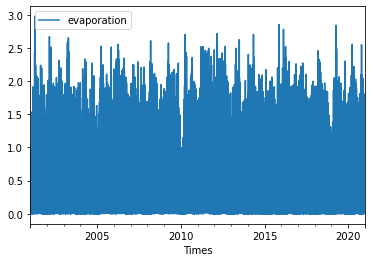

In [63]:
evap_df.plot( 'Times' , 'evaporation' )

Text(0.5, 1.0, 'Estimated evaporation using Penman-Monteith Equation')

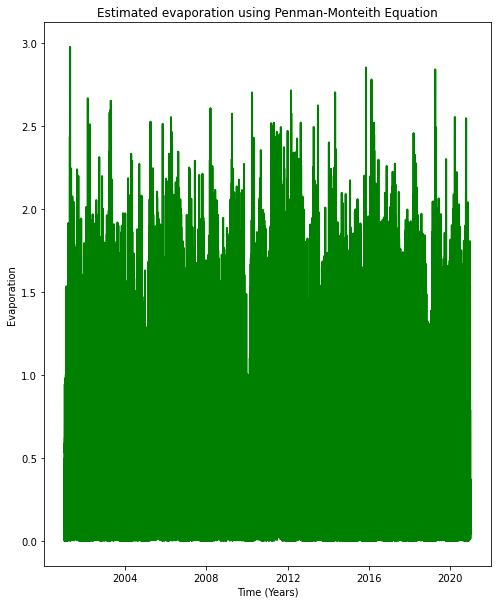

In [64]:
fig = pyplot.figure(figsize = (8,10))
ax = fig.add_subplot(111)
ax.plot_date(times, evap, fmt = '-', lw = 2, color = 'green', 
                  label = 'Penman-Monteith Equation')
ax.set_xlabel("Time (Years)")
ax.set_ylabel("Evaporation")
ax.set_title("Estimated evaporation using Penman-Monteith Equation")

In [65]:
dc_daily = evap_df.set_index('Times').resample('D').mean()
dc_daily.head()

,evaporation
Times,
2001-01-01,0.084943
2001-01-02,0.116779
2001-01-03,0.142947
2001-01-04,0.174062
2001-01-05,0.220492


In [66]:
dc_daily = dc_daily.reset_index()
dc_daily.head()

,Times,evaporation
0,2001-01-01,0.084943
1,2001-01-02,0.116779
2,2001-01-03,0.142947
3,2001-01-04,0.174062
4,2001-01-05,0.220492


In [67]:
dc_daily.tail()

,Times,evaporation
7300,2020-12-27,0.637019
7301,2020-12-28,0.194966
7302,2020-12-29,0.308437
7303,2020-12-30,0.047565
7304,2020-12-31,0.142604


In [68]:
pfile.tail()

,YEAR,MM,DD,ETOS,ETRS,ETCOOL,ETWARM,PANEVAP,date
7300,2020,12,27,0.10,0.17,0.10,0.06,0.15,2020-12-27
7301,2020,12,28,0.03,0.04,0.02,0.02,0.03,2020-12-28
7302,2020,12,29,0.06,0.10,0.06,0.04,0.08,2020-12-29
7303,2020,12,30,0.03,0.04,0.03,0.02,0.04,2020-12-30
7304,2020,12,31,0.02,0.03,0.02,0.01,0.03,2020-12-31


<AxesSubplot:xlabel='Times'>

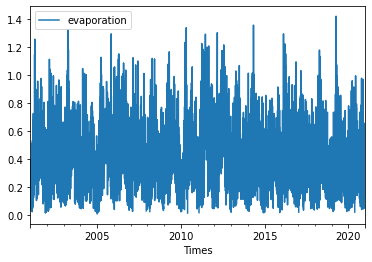

In [69]:
dc_daily.plot( 'Times' , 'evaporation' )

<AxesSubplot:xlabel='date'>

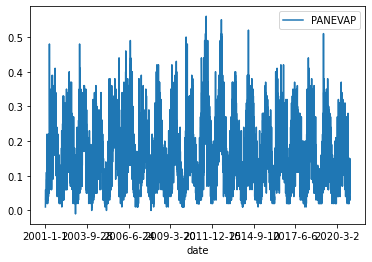

In [70]:
pfile.plot("date", "PANEVAP")

In [71]:
day_times = [start + i * datetime.timedelta(days = 1) 
          for i in range((end-start).days)]
day_evap = dc_daily["evaporation"].to_list()
pan_evap = pfile["PANEVAP"].to_list()
print(len(day_times), len(day_evap), len(pan_evap))

7305 7305 7305


In [72]:
dc_daily.head()

,Times,evaporation
0,2001-01-01,0.084943
1,2001-01-02,0.116779
2,2001-01-03,0.142947
3,2001-01-04,0.174062
4,2001-01-05,0.220492


KeyError: 'TAIR'

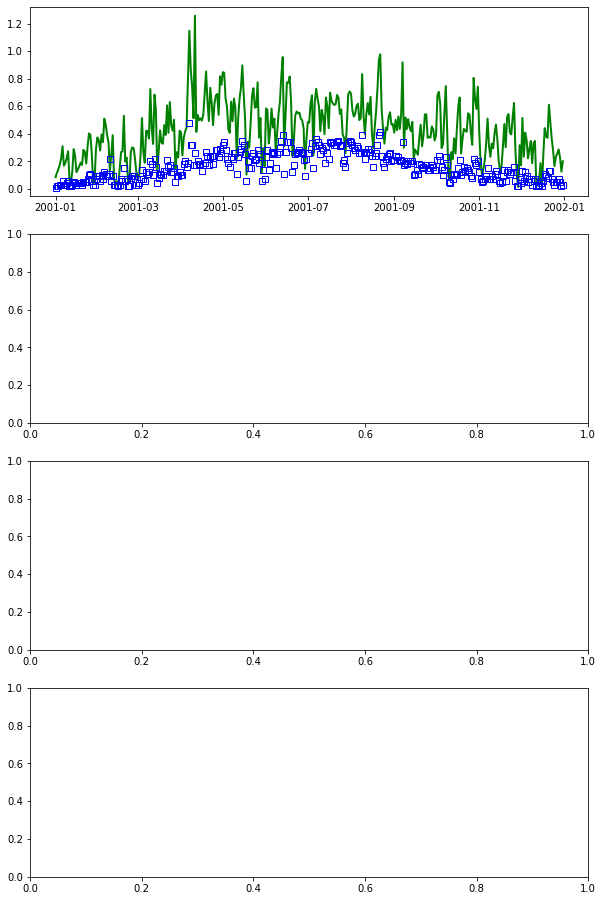

In [73]:
fig = pyplot.figure(figsize = (10,16))
ax = fig.add_subplot(111)
ax1 = pyplot.subplot(4,1,1)
ax2 = pyplot.subplot(4,1,2)
ax3 = pyplot.subplot(4,1,3)
ax4 = pyplot.subplot(4,1,4)
ax1.plot_date(day_times[0:365], day_evap[0:365], fmt = '-', lw = 2, color = 'green', 
                  label = 'Penman-Monteith Estimation')
ax1.plot_date(day_times[0:365],pan_evap[0:365], fmt = 's', 
                      markerfacecolor = 'None', markeredgecolor = 'blue', 
                      markersize = 6, label = 'Pan evaporation')
ax2.plot_date(day_times[0:365], dc_daily["TAIR"][0:365], fmt = '-', lw = 2, color = 'orange', 
                  label = 'Daily Temperature')
ax2.plot_date(day_times[0:365], dc_daily["TDEW"][0:365], fmt = '-', lw = 2, color = 'blue', 
                  label = 'Dew-point Temperature')
ax3.plot_date(day_times[0:365], dc_daily["WSPD"][0:365], fmt = '-', lw = 2, color = 'red', 
                  label = 'Wind Speed')
ax4.plot_date(day_times[0:365], dc_daily["SRAD"][0:365], fmt = '-', lw = 2, color = 'gold', 
                  label = 'Solar radiation')
ax1.legend(loc='upper right')
ax1.set_ylabel("Evaporation")
ax2.set_ylabel("Temperature ($^o$C)")

ax.set_title("Estimated evaporation using Penman-Monteith Equation")